# Análise exploratória de dados

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Criação do Dicionário de Dados

In [2]:
df = pd.read_csv("../data/raw/attention.csv")
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [3]:
df_dict = pd.DataFrame([
    {
        'variavel': 'subject',
        'descricao': 'Label do individuo no experimento',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },{
        'variavel': 'attention',
        'descricao': 'Atenção do individuo durante o experimento',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },{
        'variavel': 'solutions',
        'descricao': 'Numero de solucoes fornecidas pelo individuo',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    },{
        'variavel': 'score',
        'descricao': 'Pontuacao do individuo',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    }
])
df_dict

,variavel,descricao,tipo,subtipo
0,subject,Label do individuo no experimento,qualitativa,nominal
1,attention,Atenção do individuo durante o experimento,qualitativa,nominal
2,solutions,Numero de solucoes fornecidas pelo individuo,quantitativa,discreta
3,score,Pontuacao do individuo,quantitativa,continua


## 2. Salvando Dicionário

In [4]:
df_dict.to_csv('../data/external/dicionario.csv', index=False)

## 3. Descrição do Dados

In [10]:
df = pd.read_csv('../data/raw/attention.csv')
df.head(10)

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


In [9]:
instancias = df.shape[0]
dados_ausentes = df.isna().any().sum()
print(f'Quantidade de instâncias: {instancias}')
print(f'Dados ausentes: {dados_ausentes}')

Quantidade de instâncias: 60
Dados ausentes: 0


## 4. Perguntas de partida e hipóteses: 

### 1. Existe relação entre as variáveis de 'attention' e 'score', se sim, como estão correlacionadas
### 2. Qual o impacto das soluções no 'score'
### 3. Qual a distribuição da variável 'score'
### 4. Qual a variação de 'score' por 'subject'


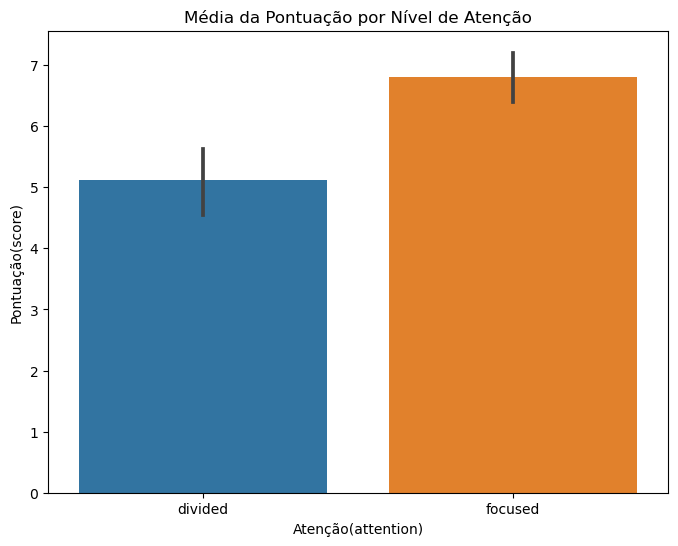

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='attention', y='score', estimator=np.mean)
plt.title('Média da Pontuação por Nível de Atenção')
plt.xlabel('Atenção(attention)')
plt.ylabel('Pontuação(score)')
plt.show()

Podemos ver que a 'attention' do tipo focused tem a média de pontuação maior do que 'divided' 

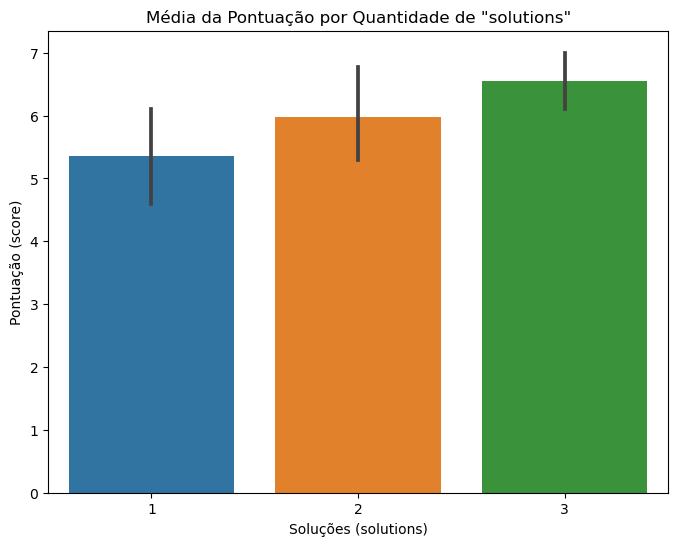

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='solutions', y='score', estimator=np.mean)
plt.title('Média da Pontuação por Quantidade de "solutions"')
plt.xlabel('Soluções (solutions)')
plt.ylabel('Pontuação (score)')
plt.show()

Podemos ver que quanto mais 'solutions' maior será a média 

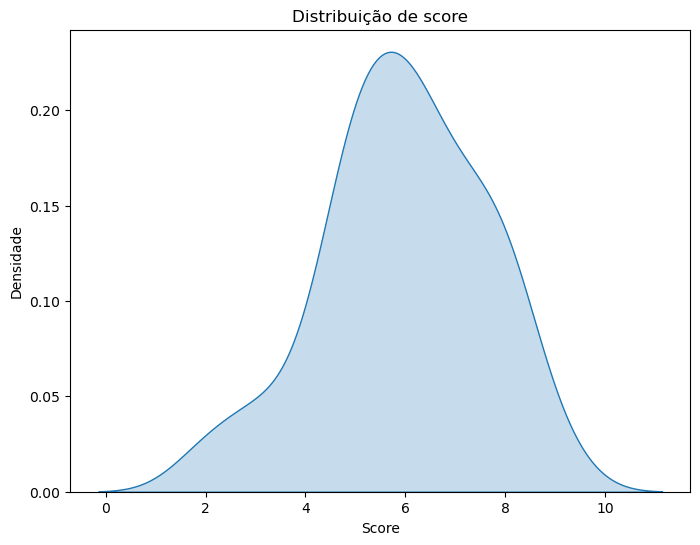

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='score', fill=True)
plt.title('Distribuição de score')
plt.xlabel('Score')
plt.ylabel('Densidade')
plt.show()

Podemos ver que a distribuição da variável 'score' está normalizada, porém apresenta assimetria à esquerda.

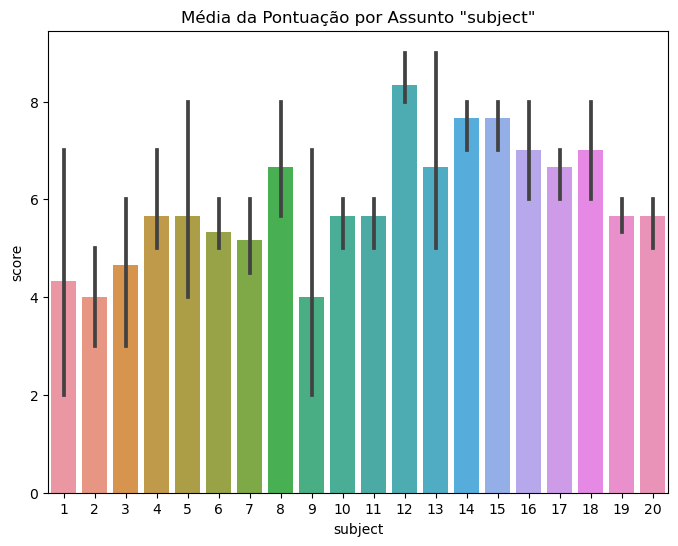

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='subject', y='score', estimator=np.mean)
plt.title('Média da Pontuação por Assunto "subject"')
plt.xlabel('subject')
plt.ylabel('score')
plt.show()

Podemos observar que o 'subject' 12 obteve, em média, melhores resultados ques os demais. Os piores resultados pertencem à 2 e 9. 